# Example of a user case 

## (1) Run iDora EDA pipeline

Typical EDA workflow: 
1. Load the set (csv or txt) 
2. Create summary statistics for your dataset 
3. Create visuals for your dataset (bar and boxplots) 
4. Transform the dataset (one-hot encodiging, label encoding & varaible removal) 
5. Produce feature importance measures and rank the features

Two ways of working with Dora: 
- Use iDora.main_run file to create a pipeline from the pre-selected functions ( by commenting out functions you don't need )
- Call the functions from iDora one by one   

 Raw dataset load 

In [1]:
# Some imports
import os
import pandas as pd
import numpy as np
import xgboost as xgb
import sys
import time
import idora

All inputs must be without spaces and separated by commas!


C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Where is your data? Indicate now!

# OR use test datasets

# # ------ Bank -------
path_to_data = r'C:\Users\pnl0516p\Documents\PyScripts\iDora\idora\test_data\Bank Marketing'
file_name = r'balanced_bank.csv'
target = 'y' # idnetify only if already known

# #  ------ Housing Prices -------
# path_to_data = r'C:\Users\pnl0516p\Documents\PyScripts\iDora\idora\test_data\HousingPricesKC'
# file_name = r'kc_house_data.csv'
# target = 'price'

# # ------ Rossman -------
# path_to_data = r'C:\Users\pnl0516p\Documents\PyScripts\iDora\idora\test_data\Rossman'
# file_name = r'train.csv'
# target = 'Sales' 

## import iDora_main as idora ( thus, refer to the tool as idora)
# os.chdir(r'C:/Users/pnl0516p/Documents/PyScripts/iDora/idora')
# import iDora_main as idora
# cwd = os.getcwd()
# os.chdir(path_to_data)
# ## Read Raw data in dataframe
# df_raw = pd.read_csv(file_name)

#### EDA pipeline
Load the data with iDora & start exploring with the following EDA pipeline:
    
* Exploration (should be always the first step you do):
 - _ = explore( df ) = get to know what columns you have 
 - summary = summarize( df ) = produce summary table for all numerical variables

* Plotting (create and save box- & barplots for numerical variables) 
 - settings.boxplots_path = make_boxplots( summary, df=df )
 - settings.barplots_path = make_barplots( summary, df=df )

* Produce HTMl (enrich summary table with plots) 
 - df_summary_plots = produce_df_plot( summary )
 - html_example = display_df( df_summary_plots,['Count','Unique','Mean'] )

* Transformation (transform data to be able to model & get more accurate MI scores)
 - df_sparse = onehot_encode( settings.cat_vars, df )

* Variables Removal
 - df_new = remove_vars( df_sparse ) 

* Saving the output
 - save_html( html_example )
 - save_df( df_new )


In [3]:
## Start the pipeline: Load dataframe from a destination, if file is txt  give the argument: txt_flag = True 
df_new = idora.pipeline.eda_run( path_to_data + '\\' + file_name )

Your data has this dimensionality: (9280, 22) 

You have 0 missing values (cells) in your data. 

These are all the variables you have: ['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'] 

Tell me the ID column name, please.
Unnamed: 0
Tell me the Date column name, please.

You have these variables with numerical values to put in a model:
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'] 

You have these variables with object type (e.g. strings):
['Unnamed: 0'] 

You might want to (one-hot) encode these variables as they have less than 100 unique numerical values
['age', 'campaign', 'pdays'

#### Checking the results in the python notebok
After running the pipeline, you can access all the variables that were produced

,Count,Unique,Mean,BoxPlot,BarPlot
Unnamed: 0,9280,8980,24826.21,,
age,9280,75,40.46,,
duration,9280,1395,386.85,,
campaign,9280,30,2.32,,
pdays,9280,26,888.35,,
previous,9280,7,0.32,,
emp.var.rate,9280,10,-0.49,,
cons.price.idx,9280,26,93.48,,
cons.conf.idx,9280,26,-40.18,,
euribor3m,9280,293,2.97,,

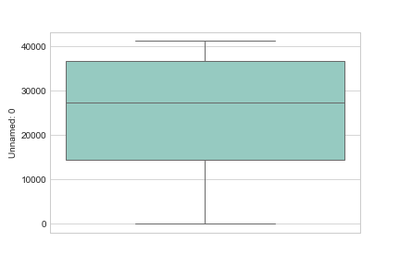
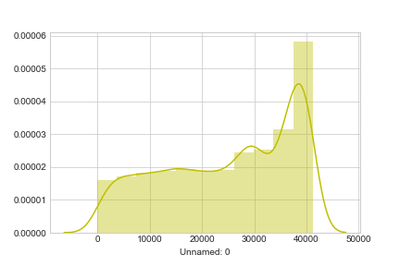
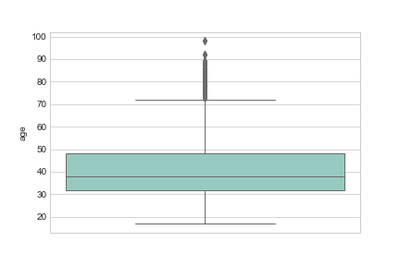
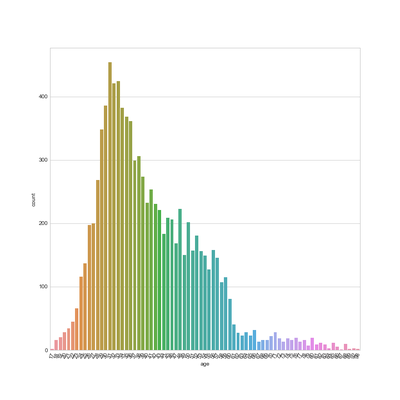
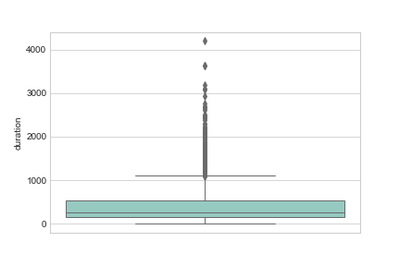
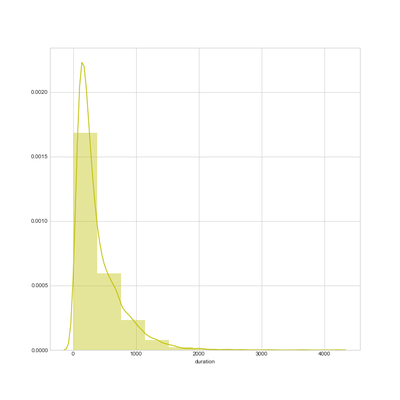
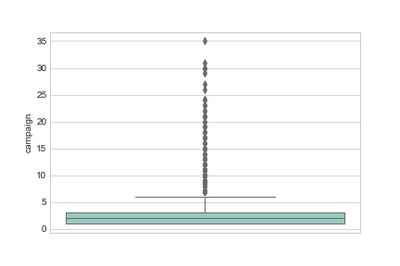
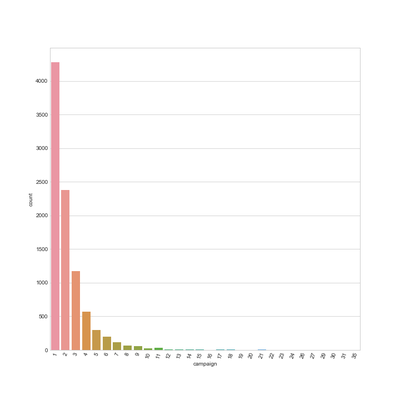
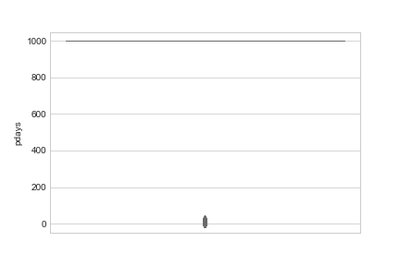
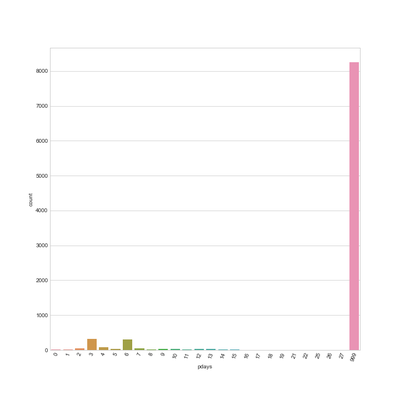
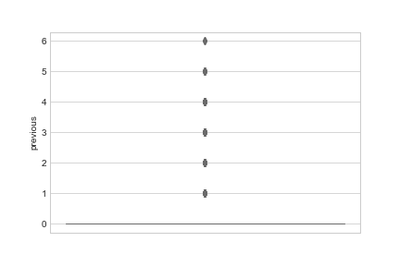
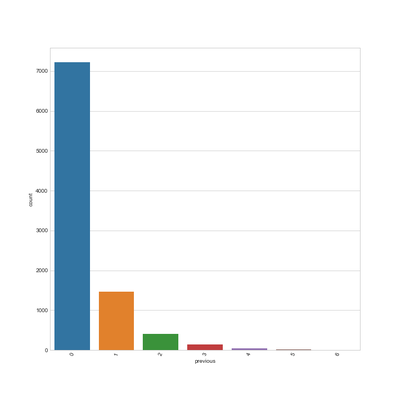
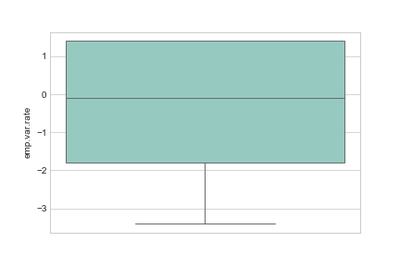
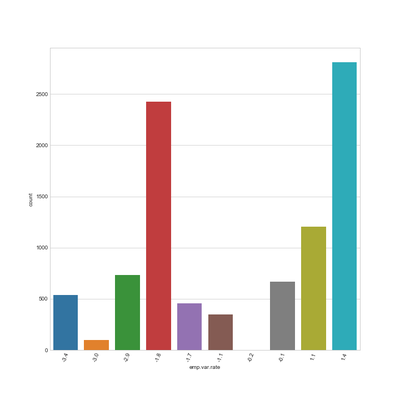
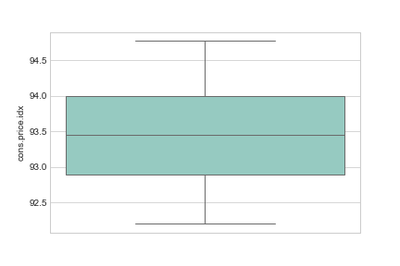
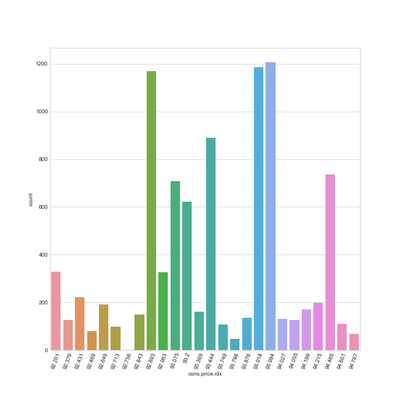
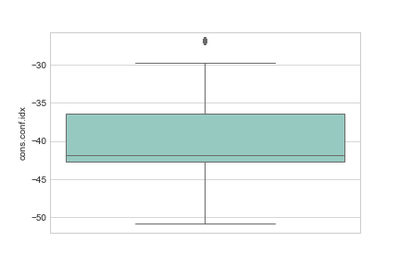
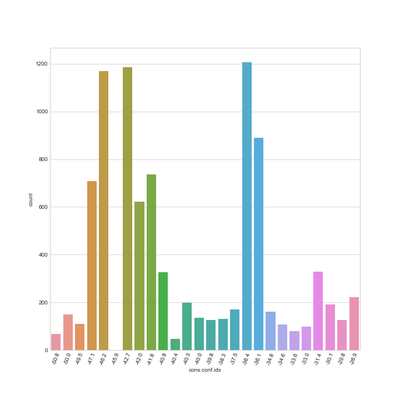
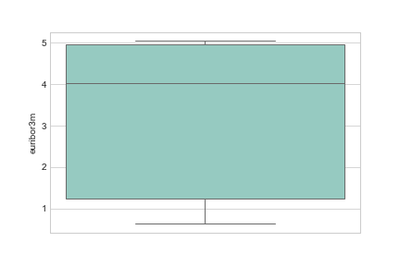
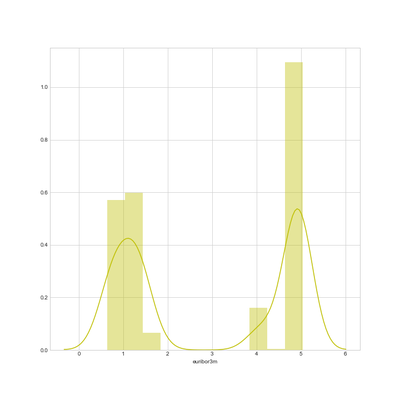
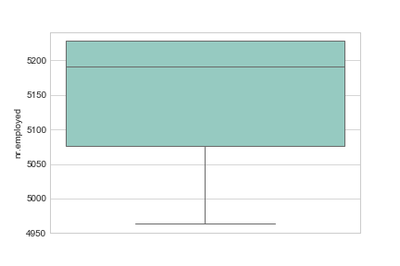
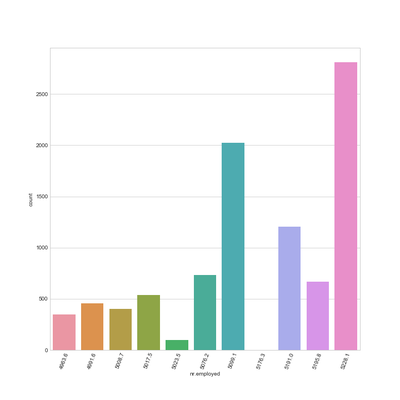

In [4]:
# Inspect descritption statistics with plots
df_new[1]

In [16]:
# Clean dataset with encoded variable - ready to put in a machine learning model or eplored further with 
#  Feature Engineering/Feature Selection tool.
df_new[0]

,default,contact,duration,euribor3m,y,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9,age_10,age_11,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,...,cons.conf.idx_12,cons.conf.idx_13,cons.conf.idx_14,cons.conf.idx_15,cons.conf.idx_16,cons.conf.idx_17,cons.conf.idx_18,cons.conf.idx_19,cons.conf.idx_20,cons.conf.idx_21,cons.conf.idx_22,cons.conf.idx_23,cons.conf.idx_24,cons.conf.idx_25,nr.employed_0,nr.employed_1,nr.employed_2,nr.employed_3,nr.employed_4,nr.employed_5,nr.employed_6,nr.employed_7,nr.employed_8,nr.employed_9,nr.employed_10
0,0,0,143,1.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,1623,4.86,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,610,4.96,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,1089,4.96,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,211,1.36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,1,221,1.29,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,1,92,4.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,1516,1.33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,0,0,208,1.03,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
9,0,0,150,0.77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [18]:
# Get to know different variables better with pivot table functionality 
idora.eda.pivot_func_on()
df_new[0].iloc[:,[1,2,3]]
# idora.eda.pivot_func_off()

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defaultColumnWidth': 150, 'rowHeight': 28, 'enableColumnReorder': False, 'enableTextSelectionOnCells': True, 'editable': True, 'autoEdit': False, 'explicitInitialization': True, 'maxVisibleRows': 15, 'minVisibleRows': 8, 'sortable': True, 'filterable': True, 'highlightSelectedCell': False, 'highlightSelectedRow': True}, precision=1)

In [20]:
idora.eda.pivot_func_off()
df_new[0]

,default,contact,duration,euribor3m,y,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9,age_10,age_11,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,...,cons.conf.idx_12,cons.conf.idx_13,cons.conf.idx_14,cons.conf.idx_15,cons.conf.idx_16,cons.conf.idx_17,cons.conf.idx_18,cons.conf.idx_19,cons.conf.idx_20,cons.conf.idx_21,cons.conf.idx_22,cons.conf.idx_23,cons.conf.idx_24,cons.conf.idx_25,nr.employed_0,nr.employed_1,nr.employed_2,nr.employed_3,nr.employed_4,nr.employed_5,nr.employed_6,nr.employed_7,nr.employed_8,nr.employed_9,nr.employed_10
0,0,0,143,1.27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,1623,4.86,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,610,4.96,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1,1089,4.96,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,211,1.36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,1,221,1.29,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,1,92,4.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,1516,1.33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,0,0,208,1.03,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
9,0,0,150,0.77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## (2) Perform iDora Feature Inspection 

Typical FI workflow: 
1. Use output of idora EDA pipeline or load another dataset: cleaned dataframe ( df_new[0] ) 
2. Indicate target and task (regression or classification) 
3. Select from available feature relevance measures (MI, X2, Pearson Corelation) 
4. Rank the features based on their feature importance values  
5. Check the last quatiles for MI valuesto get an overall idea how usefull the dataset is 

Caution: 
- All variables have to be numerical
- For regression task: use dummies or continuous features
- For regression task: straigthforward estimation of MI values for dataset bigger than 200k rows might yield RAM insufficiency error - in that case, employ bootstrapping estimation which is more prolonged, but effectve.

In [4]:
# Use data from EDA part or load another dataset
test = df_new[0]

# Indicate task
task = 'Reg' # 'Class'

# Check whether all variables are numerical
if idora.feature_inspection.numeric_check(test)[0]:
    print(" Good to go! ")
print('Non-numeric variables: ', idora.feature_inspection.numeric_check(test)[1])
var_lst = idora.feature_inspection.numeric_check(test)[1]

# Use idora.to_numeric() if non-numeric variables do not need encoding
test = idora.feature_inspection.to_numeric(test,var_lst)

# Specify the target variable !  Then, all other variables are taken as features 
#                                        ( though, you can give features yourself! ) 

# target = '?? ?? ??'
all_features = list( test.columns )
features = list( set(all_features) - set([target]) )

 Good to go! 
Non-numeric variables:  []


#### Regression: 

In [10]:
# Produce MI (Continuous target) values. 

start = time.time()
mi= idora.feature_inspection.mi_cont(test,target,features)
end = time.time()
print('MI took ',end - start,'seconds. \n')

C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516

C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516

C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516

C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p

C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516

C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516

C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516

C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int16 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pnl0516

MI took  42.860600233078 seconds. 



In [18]:
# Produce MI (Continuous target) values with Bootstrapping. 

start = time.time()
mi_brp= idora.feature_inspection.mi_cont_brp(test,target,features)
end = time.time()
print('MI with Bootsrapping took ',end - start,'seconds. \n')

In [11]:
# Produce Pearson Correlation coefficients ( also absolute values of Pearson Correlation to compare with MI )

start = time.time()
corr = idora.feature_inspection.pearson_corr(test,target,features)
corr_abs = idora.feature_inspection.pearson_corr_abs(test,target,features)
end = time.time()
print('Pearson Correlation took ',end - start,'seconds. \n')

Pearson Correlation took  0.1527998447418213 seconds. 



In [12]:
# Compile the feature importnace measures and inspect them

temp = pd.merge(mi,corr, on='feature')
# temp = pd.merge(temp,mi_brp, on='feature') 
temp = pd.merge(temp,corr_abs, on='feature')
result = temp
result.describe()

,MI_Cont,P_Corr,P_Corr_Abs
count,263.00,263.00,263.00
mean,0.01,0.02,0.06
std,0.01,0.09,0.07
min,0.00,-0.45,0.00
25%,0.00,-0.02,0.02
50%,0.00,0.02,0.04
75%,0.01,0.06,0.09
max,0.16,0.47,0.47


In [13]:
# # Check the last quantiles:
idora.feature_inspection.MI_threshold_check(result,Reg=True)

Starting with 263 features.
Only 69 features not fully independent of target.
j =  0.7
number of values in the 8st quantile is  7
mean value is  0.025142852950978196
j =  0.8
number of values in the 9st quantile is  7
mean value is  0.028218363198176024
j =  0.9
number of values in the 10st quantile is  7
mean value is  0.06870697336076782



#### Classification: 

In [5]:
## Produce MI Sklearn  (treats each values as a descrete class)
mi_norm = idora.feature_inspection.mi_class(test,target, features)

In [6]:
## Produce MI scores
start = time.time()
mi = idora.feature_inspection.mi_disc(test,target,features)
end = time.time()
print('\n',end - start)


 24.456868886947632


In [7]:
## Produce MI scores with Bootstrapping

start = time.time()
mi_brp = idora.feature_inspection.mi_disc_brp(test,target,features)
end = time.time()
print('\n',end - start)

KeyboardInterrupt: 

In [8]:
# Produce Chi2 test, features need to be non-negative 

start = time.time()
df_x2 = idora.feature_inspection.x2_scores(test,target,features)
end = time.time()
print('\n',end - start)


 0.586219310760498


In [9]:
# Compile the feature importnace measures and inspect them

temp = pd.merge(mi,mi_norm, on='feature')
# temp = pd.merge(temp,mi_brp, on='feature') 
temp = pd.merge(temp,df_x2, on='feature')
result = temp 
result.describe()

,MI_Disc,Norm_MI_Class,X2_Value
count,263.00,263.00,263.00
mean,0.01,0.01,89.19
std,0.02,0.02,403.80
min,0.00,0.00,0.01
25%,0.00,0.00,2.72
50%,0.00,0.00,11.64
75%,0.01,0.02,73.06
max,0.18,0.11,5582.36


In [10]:
# Check the last quantiles:
idora.feature_inspection.MI_threshold_check(result,Reg=False)

Starting with 263 features.
Only 43 features not fully independent of target.
j =  0.7
Number of values in the 8st quantile is  4
Mean value is  0.028834263622893597
This quantile has these features:  ['emp.var.rate_8', 'nr.employed_10', 'nr.employed_2', 'nr.employed_8']
j =  0.8
Number of values in the 9st quantile is  4
Mean value is  0.036908535116651986
This quantile has these features:  ['cons.price.idx_18', 'emp.var.rate_9', 'poutcome_1', 'previous_0']
j =  0.9
Number of values in the 10st quantile is  5
Mean value is  0.09901316050361827
This quantile has these features:  ['contact', 'duration', 'euribor3m', 'pdays_25', 'poutcome_2']

